# PROJECTE FINAL

## conjunt de dades:

buscador de dades  *Dataset Search (Google)*

**Dataset: Nudibranch observations of Greece (2001-2021)** 

identificador únic: https://doi.org/10.6084/m9.figshare.17941166.v1
data actualització del conjunt de dades: jan 6, 2022
conjunt de dades proporcionat per: Figshare
autors: Chris Taklis
llicència: Attribution 4.0 (CC BY 4.0)
àrea: Grècia, Creta, Mediterranean Sea
descripció: projecte -> "Nudibranchs of Greece" for the period 2001-2021.

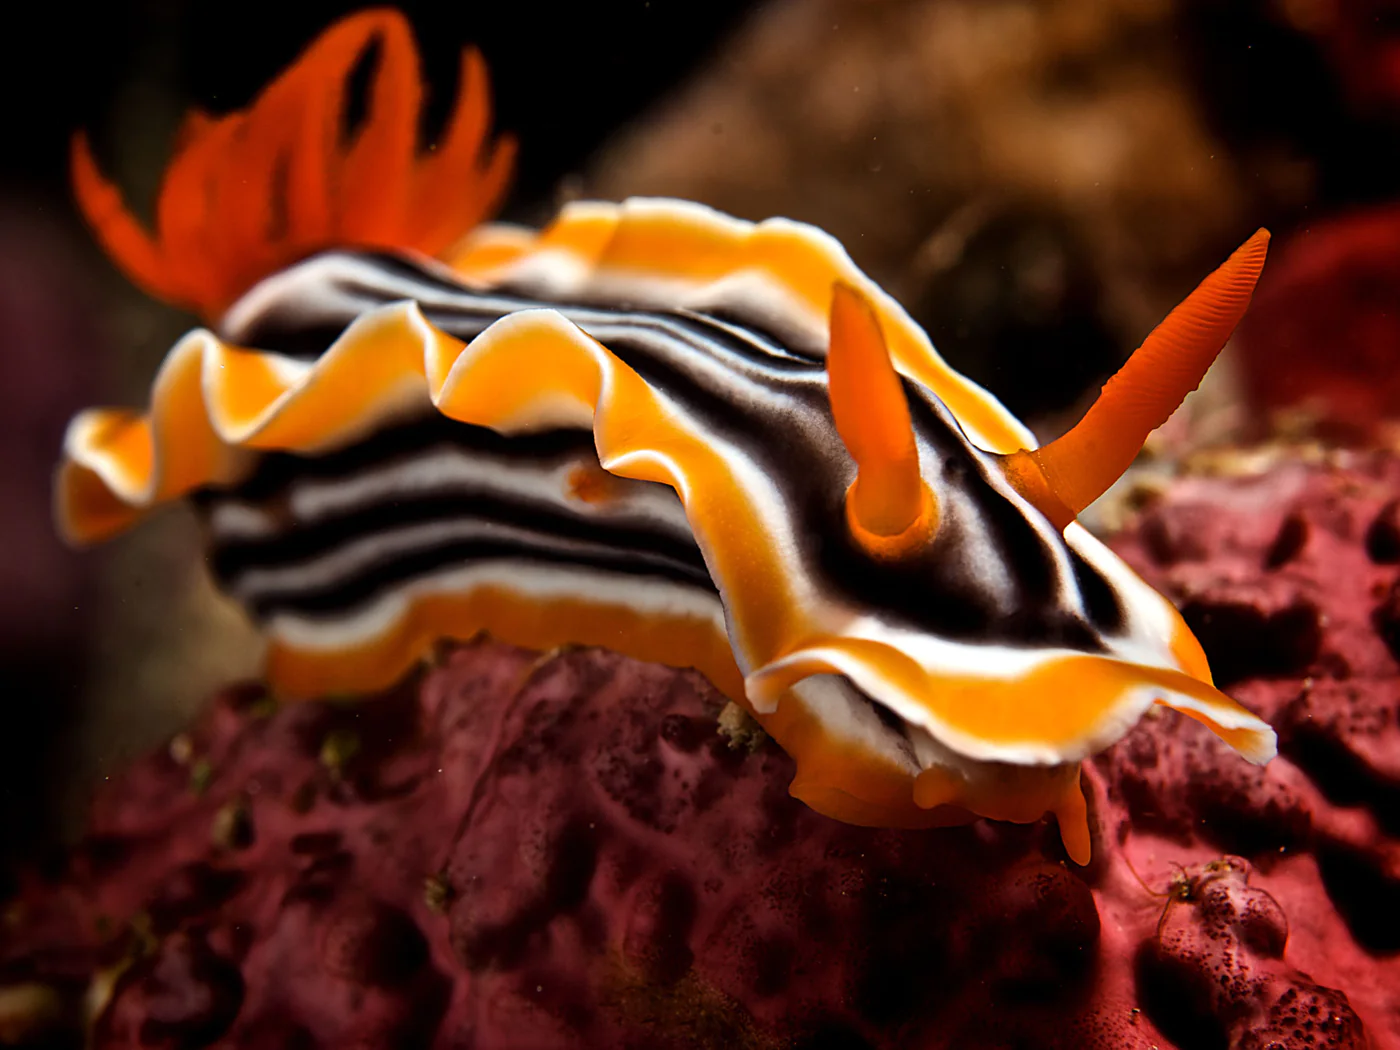


## característiques generals de les dades:

dades obtingudes a partir d'observacions de nudibranquis fetes per professionals i aficionats que enregistren a: https://www.inaturalist.org

a partir d'aquests registres es crea un dataframe amb dades científiques primàries (sense procesar) organitzades en files i columnes (variables) i amb valors numèrics i alfanumèrics; en el context de realitzar un cens de nudibranquis a Grècia.

trobem dades del tipus: str, int, float, bool i nonetype

font: https://figshare.com/articles/dataset/Dataset_Nudibranch_observations_of_Greece_2001-2021_/17941166/1


## definició de variables:

obtenció manual de dades a través de registres fets per diferents participants.
registre de diferents variables per detallar millor les observacions i aconseguir una bona base de dades.

variables més representatives:
. datetime: informació quantitativa de registres
. str: nom científic d'espècies i lloc d'observació
. int: caracterisitiques físiques durant les observacions per realitzar anàlisi


## objectius del projecte:

estudi de la distribució de nudibranquis

saber si la presència d'una espècie pot estar determinada per les condicions físiques de l'aigua (temperatura i profunditat de l'observació).



## preparació dataframe 

In [1]:
# importació llibreries
# dataframe

import numpy as np
import pandas as pd

nu = pd.read_csv('90v3.csv')
nu

observed_on         time_observed_at  user_id         user_login  \
0       31/8/15                      NaN    63211       stevedaniels   
1       12/6/16                      NaN    63211       stevedaniels   
2      22/10/01                      NaN   303997       erwinkoehler   
3       30/4/17  2017-04-30 06:49:00 UTC    63211       stevedaniels   
4        6/8/17  2017-08-06 03:30:00 UTC   527591     francesco_lami   
..          ...                      ...      ...                ...   
587     28/7/18  2018-07-28 09:48:00 UTC  2869800  spyrusmatthaiakis   
588     29/7/19  2019-07-29 03:35:00 UTC  2869800  spyrusmatthaiakis   
589     29/7/19  2019-07-29 03:51:00 UTC  2869800  spyrusmatthaiakis   
590      8/8/19  2019-08-08 10:58:00 UTC  2869800  spyrusmatthaiakis   
591     20/8/19  2019-08-20 12:15:00 UTC  2869800  spyrusmatthaiakis   

    quality_grade   license  \
0        research  CC-BY-NC   
1        research  CC-BY-NC   
2        research  CC-BY-NC   
3        research  CC-BY-NC   
4        research  CC-BY-NC   
..            ...       ...   
587      research  CC-BY-NC   
588      research  CC-BY-NC   
589      research  CC-BY-NC   
590      research  CC-BY-NC   
591      research  CC-BY-NC   

                                                   url  \
0      http://www.inaturalist.org/observations/3035501   
1      http://www.inaturalist.org/observations/3464963   
2      http://www.inaturalist.org/observations/3890866   
3     https://www.inaturalist.org/observations/6232653   
4     https://www.inaturalist.org/observations/7507585   
..                                                 ...   
587  https://www.inaturalist.org/observations/10411...   
588  https://www.inaturalist.org/observations/10411...   
589  https://www.inaturalist.org/observations/10411...   
590  https://www.inaturalist.org/observations/10411...   
591  https://www.inaturalist.org/observations/10412...   

                                             image_url   latitude  longitude  \
0    https://inaturalist-open-data.s3.amazonaws.com...  35.018090  25.859783   
1    https://inaturalist-open-data.s3.amazonaws.com...  35.018020  25.857165   
2    https://inaturalist-open-data.s3.amazonaws.com...  35.255132  25.737276   
3    https://inaturalist-open-data.s3.amazonaws.com...  35.018012  25.857568   
4    https://static.inaturalist.org/photos/9783995/...  36.378978  28.238609   
..                                                 ...        ...        ...   
587  https://inaturalist-open-data.s3.amazonaws.com...  40.004458  23.570696   
588  https://inaturalist-open-data.s3.amazonaws.com...  40.005905  23.566576   
589  https://inaturalist-open-data.s3.amazonaws.com...  40.005379  23.571383   
590  https://inaturalist-open-data.s3.amazonaws.com...  40.003932  23.574129   
591  https://inaturalist-open-data.s3.amazonaws.com...  40.011109  23.550505   

     ...  field:abundance data accuracy field:abundance | anzahl ind.  \
0    ...                            NaN                           NaN   
1    ...                            NaN                           NaN   
2    ...                            NaN                           NaN   
3    ...                            NaN                           NaN   
4    ...                            NaN                           NaN   
..   ...                            ...                           ...   
587  ...                            NaN                           NaN   
588  ...                            NaN                           NaN   
589  ...                            NaN                           NaN   
590  ...                            NaN                           NaN   
591  ...                            NaN                           NaN   

    field:depth field:depth (m) field:diving. snorkeling. angling. shore etc  \
0           NaN             NaN                                          NaN   
1           NaN             NaN                                        

In [70]:
# observació del dataframe
# eliminació de columnes innecessàries (neteja dataframe)

# eliminació latitud i longitud -> no és necessària la precissió
# elminiació nom comú (grec) -> nom cientific és internacional

# dataframe principal -> nudis

# definir/renombrar columnes

nou_nom = nu.rename(columns={"place_county_name": "place", "scientific_name": "name", "field:depth (m)": "depth", "field:temperature (c)": "temperature"})


nudis = nou_nom.drop(columns=['user_id', 'user_login', 'quality_grade', 'license', 'url', 'image_url', 'latitude', 'longitude', 'positional_accuracy', 'common_name', 'field:abundance data accuracy','field:abundance | anzahl ind.', 'field:depth', 'field:diving. snorkeling. angling. shore etc', 'field:laying eggs', 'field:length (cm)', 'field:mating specimens'], axis=1)

# NaN to zero 
nudis = nudis.replace(np.nan, 0)

nudis

observed_on         time_observed_at       place  \
0       31/8/15                        0     Lasithi   
1       12/6/16                        0     Lasithi   
2      22/10/01                        0     Lasithi   
3       30/4/17  2017-04-30 06:49:00 UTC     Lasithi   
4        6/8/17  2017-08-06 03:30:00 UTC  Dodecanese   
..          ...                      ...         ...   
587     28/7/18  2018-07-28 09:48:00 UTC  Khalkidiki   
588     29/7/19  2019-07-29 03:35:00 UTC  Khalkidiki   
589     29/7/19  2019-07-29 03:51:00 UTC  Khalkidiki   
590      8/8/19  2019-08-08 10:58:00 UTC  Khalkidiki   
591     20/8/19  2019-08-20 12:15:00 UTC  Khalkidiki   

                          name taxon_kingdom_name taxon_phylum_name  \
0        Umbraculum umbraculum           Animalia          Mollusca   
1                Elysia timida           Animalia          Mollusca   
2      Peltodoris atromaculata           Animalia          Mollusca   
3             Aplysia punctata           Animalia          Mollusca   
4          Aplysia dactylomela           Animalia          Mollusca   
..                         ...                ...               ...   
587  Paraflabellina gabinierei           Animalia          Mollusca   
588             Felimare picta           Animalia          Mollusca   
589             Felimare picta           Animalia          Mollusca   
590             Felimare picta           Animalia          Mollusca   
591    Dendrodoris grandiflora           Animalia          Mollusca   

    taxon_class_name taxon_order_name taxon_family_name taxon_genus_name  \
0         Gastropoda      Umbraculida      Umbraculidae       Umbraculum   
1         Gastropoda                0   Plakobranchidae           Elysia   
2         Gastropoda     Nudibranchia    Discodorididae       Peltodoris   
3         Gastropoda        Aplysiida        Aplysiidae          Aplysia   
4         Gastropoda        Aplysiida        Aplysiidae          Aplysia   
..               ...              ...               ...              ...   
587       Gastropoda     Nudibranchia     Flabellinidae   Paraflabellina   
588       Gastropoda     Nudibranchia   Chromodorididae         Felimare   
589       Gastropoda     Nudibranchia   Chromodorididae         Felimare   
590       Gastropoda     Nudibranchia   Chromodorididae         Felimare   
591       Gastropoda     Nudibranchia   Dendrodorididae      Dendrodoris   

            taxon_species_name  depth field:mediterranean marine habitat  \
0        Umbraculum umbraculum    0.0                                  0   
1                Elysia timida    0.0                                  0   
2      Peltodoris atromaculata    0.0                                  0   
3             Aplysia punctata    0.0                                  0   
4          Aplysia dactylomela    0.0                                  0   
..                         ...    ...                                ...   
587  Paraflabellina gabinierei    0.0                                  0   
588             Felimare picta    0.0                                  0   
589             Felimare picta    0.0                                  0   
590             Felimare picta    0.0                                  0   
591    Dendrodoris grandiflora    0.0                                  0   

     temperature  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
..           ...  
587          0.0  
588          0.0  
589          0.0  
590          0.0  
591          0.0  

[592 rows x 14 columns]

In [71]:
# informació dataframe (tipo de dades -> Dtype)

nudis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   observed_on                         592 non-null    object 
 1   time_observed_at                    592 non-null    object 
 2   place                               592 non-null    object 
 3   name                                592 non-null    object 
 4   taxon_kingdom_name                  592 non-null    object 
 5   taxon_phylum_name                   592 non-null    object 
 6   taxon_class_name                    592 non-null    object 
 7   taxon_order_name                    592 non-null    object 
 8   taxon_family_name                   592 non-null    object 
 9   taxon_genus_name                    592 non-null    object 
 10  taxon_species_name                  592 non-null    object 
 11  depth                               592 non-n

In [41]:
# número nulls per columna

nudis.isnull().sum() 

# NaN a zero -> no existeixen nulls en el dataframe 

observed_on                           0
time_observed_at                      0
place_county_name                     0
scientific_name                       0
taxon_kingdom_name                    0
taxon_phylum_name                     0
taxon_class_name                      0
taxon_order_name                      0
taxon_family_name                     0
taxon_genus_name                      0
taxon_species_name                    0
depth                                 0
field:mediterranean marine habitat    0
temperature                           0
dtype: int64

In [73]:
# consersió float64 to int64 per plotejar
nudis['place'] = nudis['place'].astype(str)
nudis['name'] = nudis['name'].astype(str)

nudis['depth'] = nudis['depth'].astype(int)
nudis['temperature'] = nudis['temperature'].astype(int)
nudis

observed_on         time_observed_at       place  \
0       31/8/15                        0     Lasithi   
1       12/6/16                        0     Lasithi   
2      22/10/01                        0     Lasithi   
3       30/4/17  2017-04-30 06:49:00 UTC     Lasithi   
4        6/8/17  2017-08-06 03:30:00 UTC  Dodecanese   
..          ...                      ...         ...   
587     28/7/18  2018-07-28 09:48:00 UTC  Khalkidiki   
588     29/7/19  2019-07-29 03:35:00 UTC  Khalkidiki   
589     29/7/19  2019-07-29 03:51:00 UTC  Khalkidiki   
590      8/8/19  2019-08-08 10:58:00 UTC  Khalkidiki   
591     20/8/19  2019-08-20 12:15:00 UTC  Khalkidiki   

                          name taxon_kingdom_name taxon_phylum_name  \
0        Umbraculum umbraculum           Animalia          Mollusca   
1                Elysia timida           Animalia          Mollusca   
2      Peltodoris atromaculata           Animalia          Mollusca   
3             Aplysia punctata           Animalia          Mollusca   
4          Aplysia dactylomela           Animalia          Mollusca   
..                         ...                ...               ...   
587  Paraflabellina gabinierei           Animalia          Mollusca   
588             Felimare picta           Animalia          Mollusca   
589             Felimare picta           Animalia          Mollusca   
590             Felimare picta           Animalia          Mollusca   
591    Dendrodoris grandiflora           Animalia          Mollusca   

    taxon_class_name taxon_order_name taxon_family_name taxon_genus_name  \
0         Gastropoda      Umbraculida      Umbraculidae       Umbraculum   
1         Gastropoda                0   Plakobranchidae           Elysia   
2         Gastropoda     Nudibranchia    Discodorididae       Peltodoris   
3         Gastropoda        Aplysiida        Aplysiidae          Aplysia   
4         Gastropoda        Aplysiida        Aplysiidae          Aplysia   
..               ...              ...               ...              ...   
587       Gastropoda     Nudibranchia     Flabellinidae   Paraflabellina   
588       Gastropoda     Nudibranchia   Chromodorididae         Felimare   
589       Gastropoda     Nudibranchia   Chromodorididae         Felimare   
590       Gastropoda     Nudibranchia   Chromodorididae         Felimare   
591       Gastropoda     Nudibranchia   Dendrodorididae      Dendrodoris   

            taxon_species_name  depth field:mediterranean marine habitat  \
0        Umbraculum umbraculum      0                                  0   
1                Elysia timida      0                                  0   
2      Peltodoris atromaculata      0                                  0   
3             Aplysia punctata      0                                  0   
4          Aplysia dactylomela      0                                  0   
..                         ...    ...                                ...   
587  Paraflabellina gabinierei      0                                  0   
588             Felimare picta      0                                  0   
589             Felimare picta      0                                  0   
590             Felimare picta      0                                  0   
591    Dendrodoris grandiflora      0                                  0   

     temperature  
0              0  
1              0  
2              0  
3              0  
4              0  
..           ...  
587            0  
588            0  
589            0  
590            0  
591            0  

[592 rows x 14 columns]

In [74]:
# informació dataframe (després de les conversions)
nudis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   observed_on                         592 non-null    object
 1   time_observed_at                    592 non-null    object
 2   place                               592 non-null    object
 3   name                                592 non-null    object
 4   taxon_kingdom_name                  592 non-null    object
 5   taxon_phylum_name                   592 non-null    object
 6   taxon_class_name                    592 non-null    object
 7   taxon_order_name                    592 non-null    object
 8   taxon_family_name                   592 non-null    object
 9   taxon_genus_name                    592 non-null    object
 10  taxon_species_name                  592 non-null    object
 11  depth                               592 non-null    int64 

In [75]:
# resum estadistic del dataset

nudis.describe()

depth  temperature
count  592.000000   592.000000
mean     1.266892     4.055743
std      4.426468     9.091485
min      0.000000     0.000000
25%      0.000000     0.000000
50%      0.000000     0.000000
75%      0.000000     0.000000
max     30.000000    31.000000

## observacions totals d'espècies (nom_científic) -> variable categòrica

In [77]:
#total especies observades

nudis.name.nunique()

60

In [78]:
# total valors nom_científic

tot_nudis = nudis['name'].value_counts()
tot_nudis

Cratena peregrina               81
Flabellina affinis              81
Peltodoris atromaculata         56
Aplysia dactylomela             35
Felimare picta                  35
Elysia timida                   31
Bursatella leachii              31
Thuridilla hopei                24
Coryphellina rubrolineata       19
Phyllidia flava                 18
Nudibranchia                    17
Umbraculum umbraculum           17
Aplysia fasciata                16
Melibe viridis                  10
Flabellina cavolini             10
Caloria elegans                  9
Tylodina perversa                7
Facelina rubrovittata            7
Edmundsella pedata               6
Pleurobranchus testudinarius     5
Platydoris argo                  5
Aplysia                          5
Caloria quatrefagesi             4
Felimare villafranca             4
Aplysia punctata                 4
Paraflabellina gabinierei        3
Spurilla neapolitana             3
Doridoidea                       3
Dendrodoris grandifl

Text(0, 0.5, 'NÚMERO OBSERVACIONS')

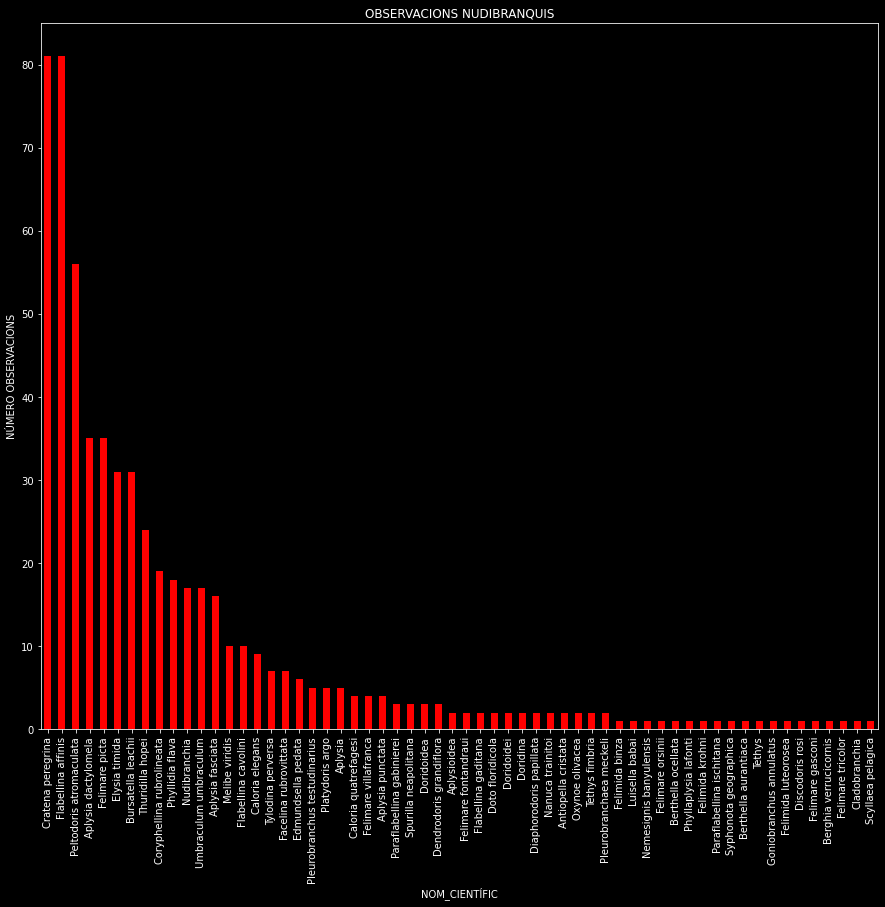

In [79]:
# gràfica observacions per espècies

import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use(['dark_background'])

# plot -> valors nom_científic
tot_nudis.plot(figsize = (15,13), kind = 'bar', color = 'r')

#labels del plot

plt.title("OBSERVACIONS NUDIBRANQUIS")
plt.xlabel("NOM_CIENTÍFIC")
plt.ylabel("NÚMERO OBSERVACIONS")

## espècies més observades: 

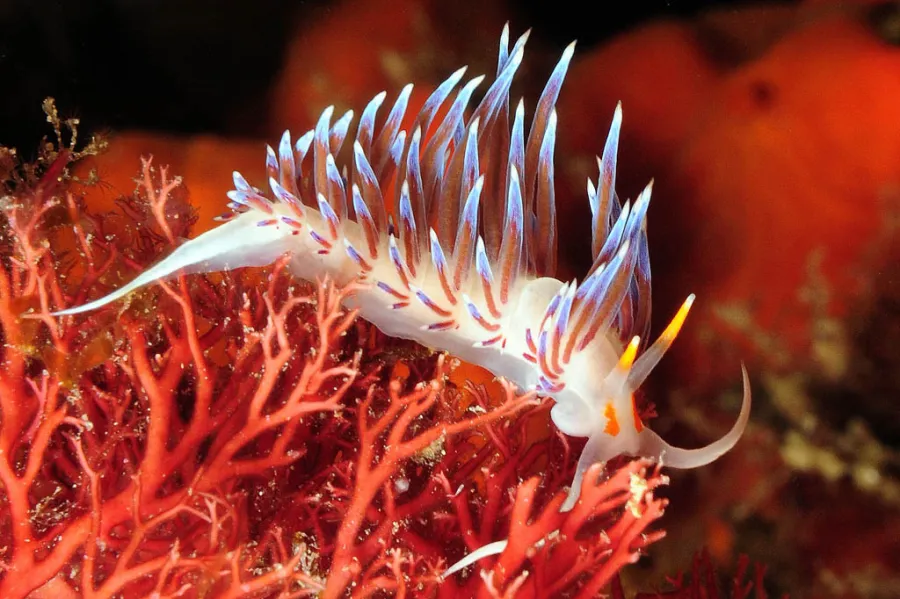
**Cratena peregrina** (81 observacions)

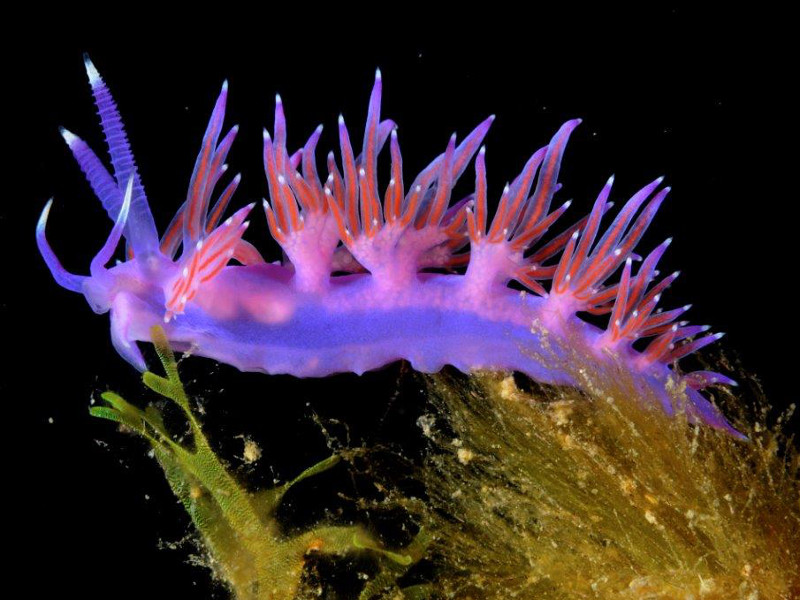
**Flabellina affinis** (81 observacions)

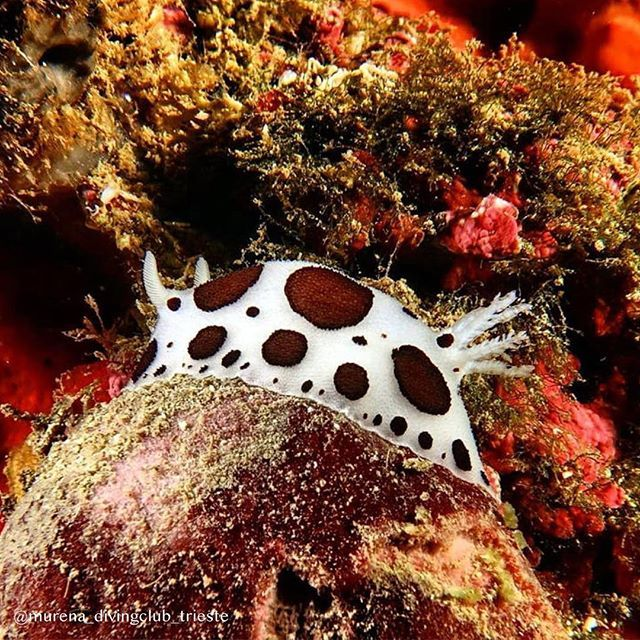
**Peltodoris atromaculata** (56 observacions)

## llocs d'observacions -> variable categòrica

In [80]:
# selecció columnes

nudis_lloc = nudis[['place','name']]

# agrupació per llocs (saber on es poden observar més especies )

loc_nudis = nudis_lloc.groupby(['place']).count()
loc_nudis


name
place                      
0                         4
Achaea                    3
Aitolia and Akarnania     2
Arcadia                   1
Attica                   19
Boeotia                   2
Chalkidiki                1
Corfu                     2
Corinth                   2
Cyclades                125
Dodecanese               55
Euboea                    8
Fthiotis                  1
Heraklion                 4
Kavala                    2
Kefallinia                2
Khalkidiki              100
Khania                   40
Laconia                   1
Larisa                    1
Lasithi                   9
Lesvos                    8
Levkas                    6
Magnesia                176
Mount Athos               1
Pieria                    1
Rethymnon                 5
Rodopi                    2
Samos                     3
Thessaloniki              6

Text(0, 0.5, 'NÚMERO_OBSERVACIONS')

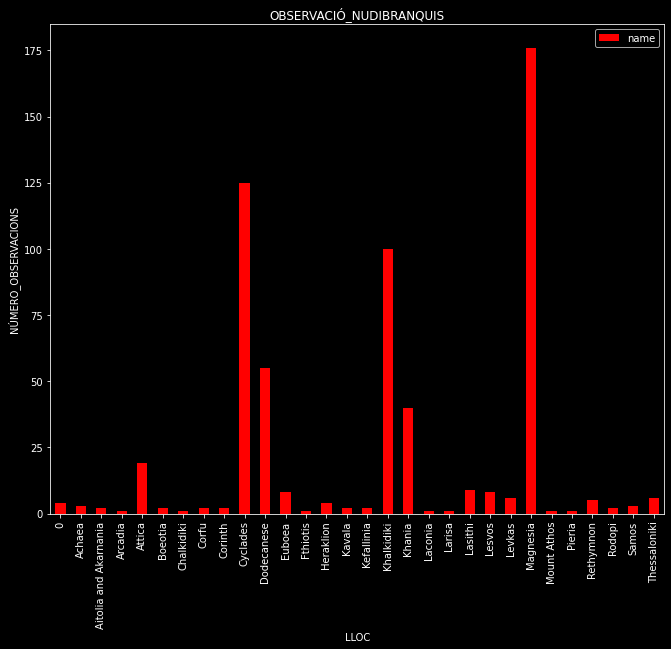

In [81]:
# plot llocs observació 

loc_nudis.plot(figsize = (11,9), kind = 'bar', color = 'r')
plt.title("OBSERVACIÓ_NUDIBRANQUIS")
plt.xlabel("LLOC")
plt.ylabel("NÚMERO_OBSERVACIONS")

In [82]:
# selecció columnes a visutalitzar

lnt = nudis[['place','name', 'temperature']]

nt = lnt.groupby(['name', 'temperature']).sum()
nt

place
name                  temperature                                                   
Antiopella cristata   0                                                   Khalkidiki
                      18                                                      Khania
Aplysia               0                                         Attica00AtticaKavala
Aplysia dactylomela   0            DodecaneseDodecaneseLasithiCycladesAtticaAttic...
Aplysia fasciata      0            MagnesiaLevkasRodopiDodecanese0DodecaneseEuboe...
...                                                                              ...
Thuridilla hopei      27                                                    Magnesia
Tylodina perversa     0            KhalkidikiKhalkidikiCycladesDodecaneseKhaniaDo...
                      19                                                      Khania
Umbraculum umbraculum 0            LasithiDodecaneseKhalkidikiEuboeaCycladesCycla...
                      23                                                      Khania

[108 rows x 1 columns]

In [85]:
lt = lnt.groupby(['place', 'name']).sum()
lt

temperature
place        name                              
0            Aplysia                          0
             Aplysia fasciata                 0
             Felimare picta                   0
Achaea       Cratena peregrina                0
             Flabellina affinis               0
...                                         ...
Rodopi       Felimare picta                   0
Samos        Aplysia dactylomela              0
             Umbraculum umbraculum            0
Thessaloniki Aplysia fasciata                 0
             Bursatella leachii               0

[179 rows x 1 columns]

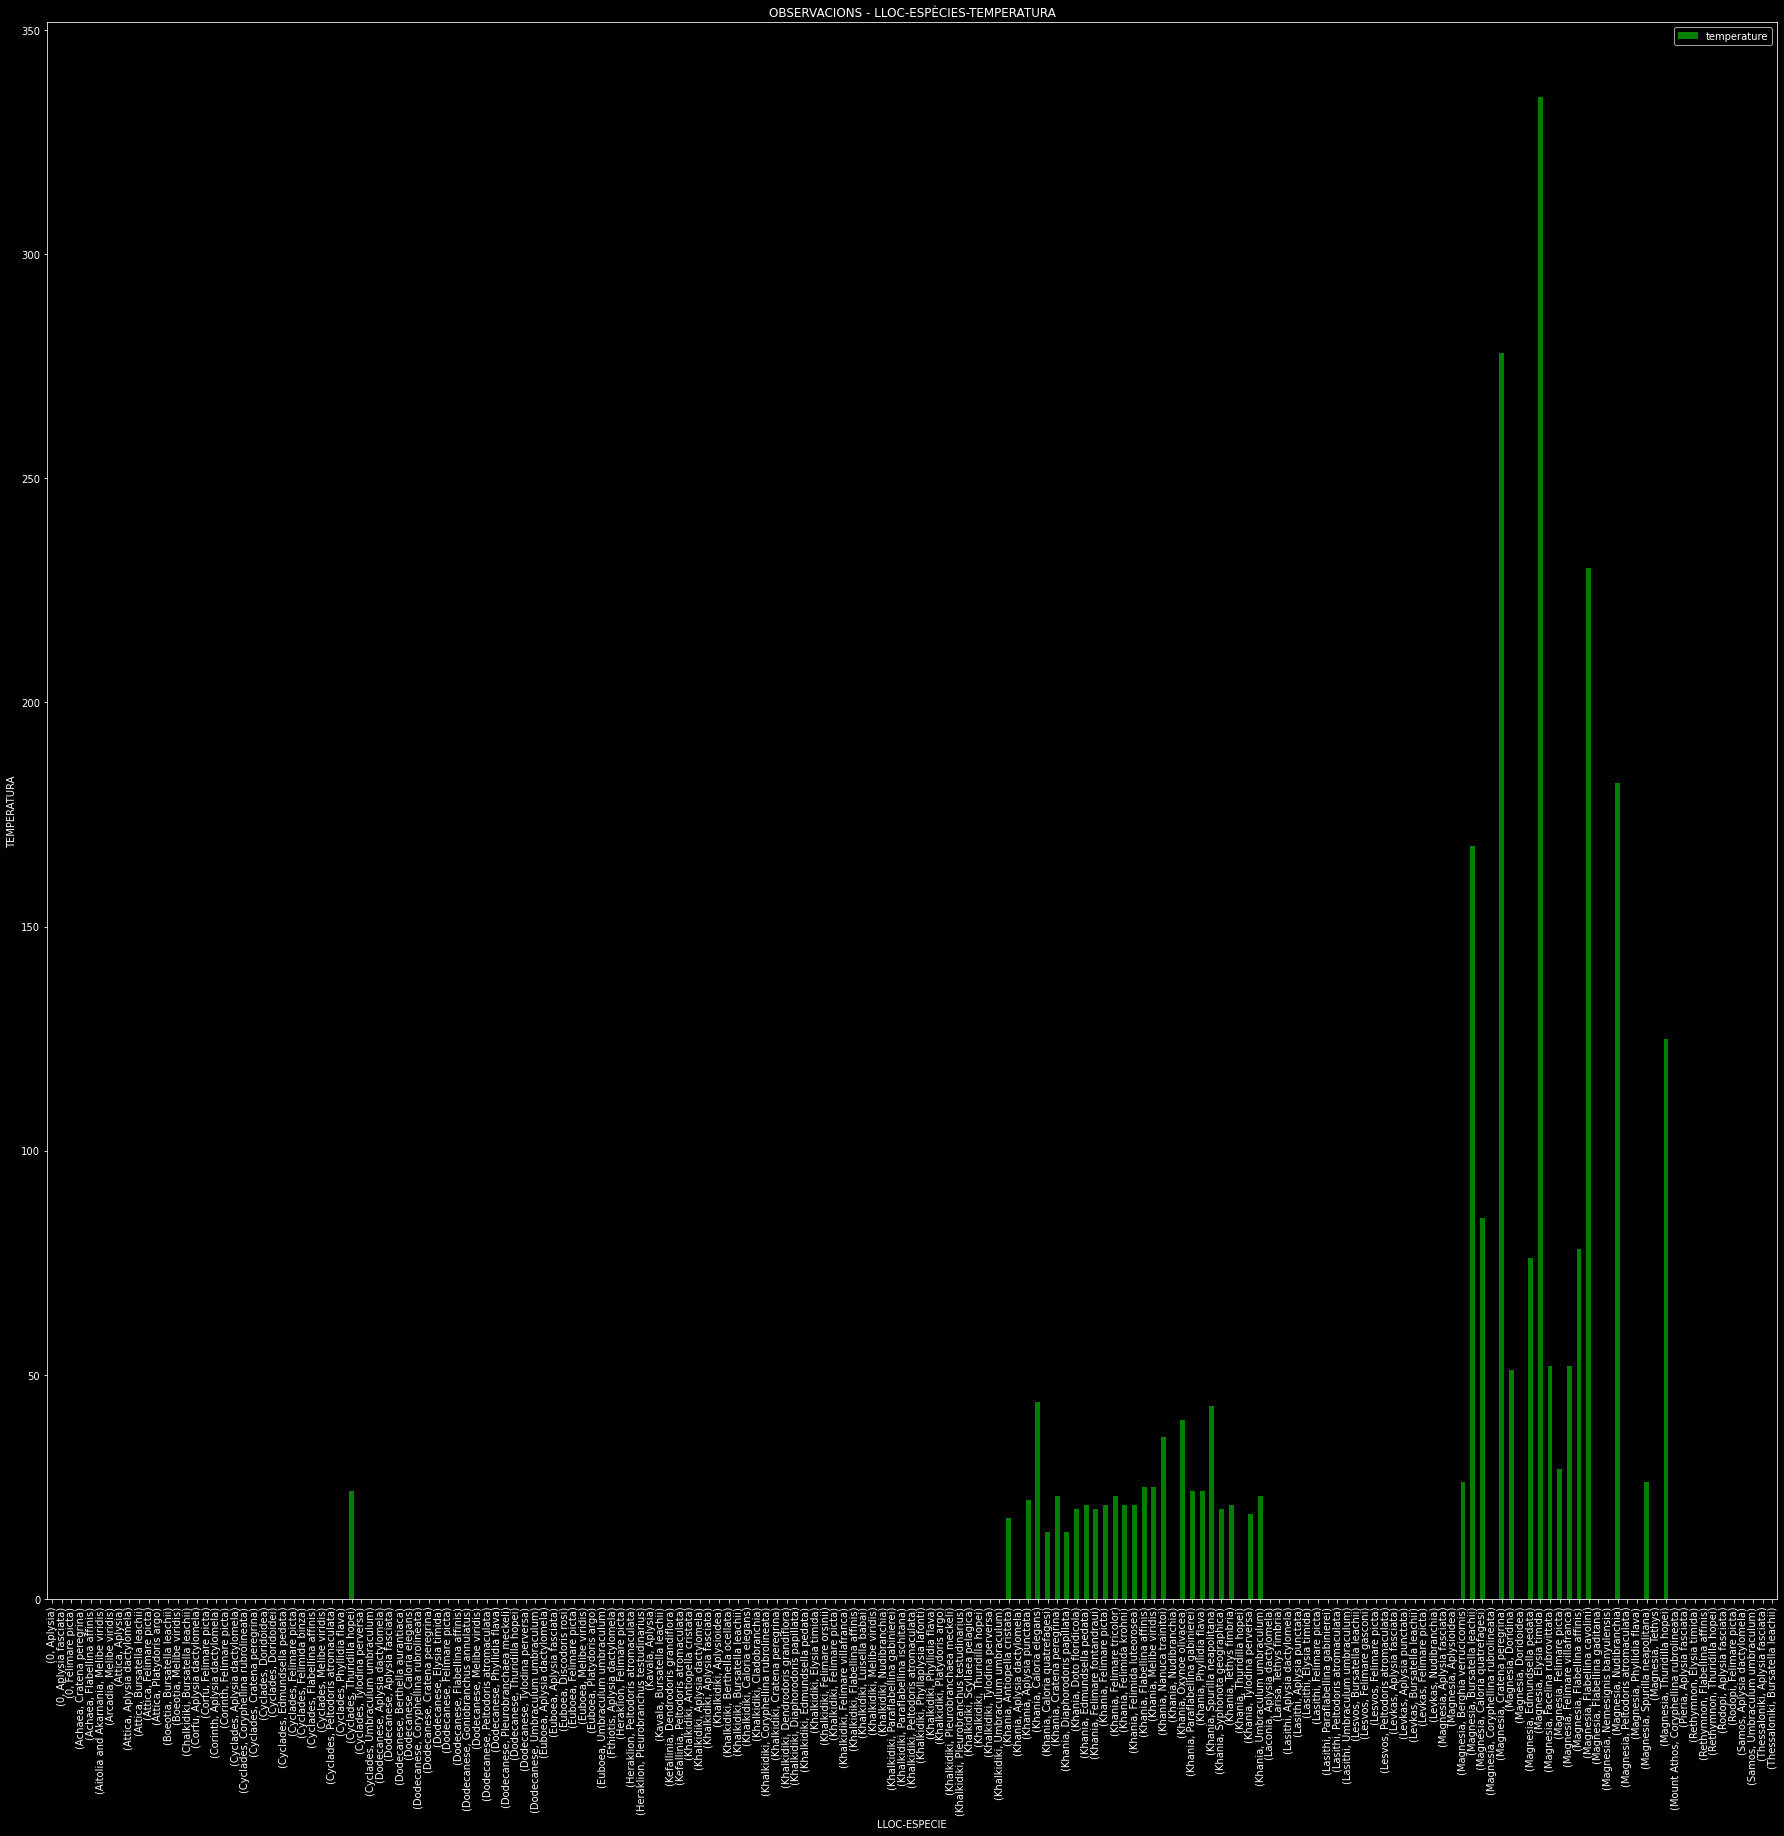

In [86]:
lt.plot(figsize = (31,29), kind='bar', color = 'g') 
plt.title("OBSERVACIONS - LLOC-ESPÈCIES-TEMPERATURA") 
plt.xlabel("LLOC-ESPECIE")
plt.ylabel("TEMPERATURA")

plt.show()

## resum estadistic temperatura

In [87]:
#mean (average) - to measure the center of a distribution of data
nudis.temperature.mean()

4.055743243243243

In [88]:
# variance and standard deviation
nudis.temperature.mean()- nudis.temperature.std()

-5.035741446448463

In [89]:
# variance
nudis.temperature.iloc[[1], ]

1    0
Name: temperature, dtype: int64

In [90]:
# standard deviation
nudis.temperature.std()

9.091484689691706

Text(0.5, 0, 'TEMPERATURA')

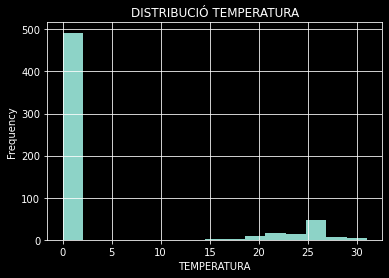

In [91]:
# histograma temperatura -> densitat de les dades
nudis.hist(['temperature'], bins=15)
plt.title('DISTRIBUCIÓ TEMPERATURA')
plt.ylabel('Frequency')
plt.xlabel('TEMPERATURA')

## resum estadistic profunditat

In [92]:
#mean (average) - to measure the center of a distribution of data
nudis.depth.mean()

1.2668918918918919

In [93]:
# variance and standard deviation
nudis.depth.mean()- nudis.depth.std()

-3.159576543625038

In [94]:
# variance
nudis.depth.iloc[[1], ]

1    0
Name: depth, dtype: int64

In [95]:
# standard deviation
nudis.depth.std()

4.42646843551693

Text(0.5, 0, 'PROFUNDITAT')

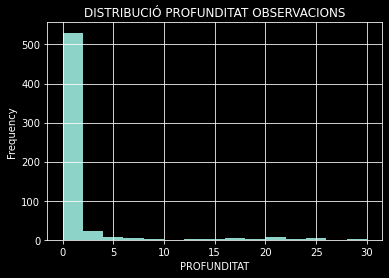

In [96]:
# histograma profunditat -> densitat de les dades
nudis.hist(['depth'], bins=15)
plt.title('DISTRIBUCIÓ PROFUNDITAT OBSERVACIONS')
plt.ylabel('Frequency')
plt.xlabel('PROFUNDITAT')

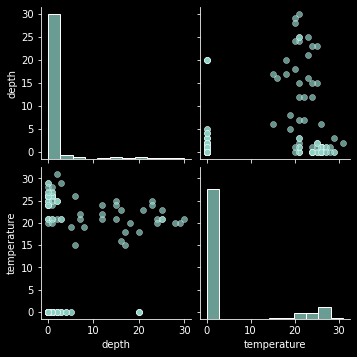

In [97]:
# Matrix Plot

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.pairplot(nudis, diag_kind='hist', plot_kws={'alpha': 0.7})

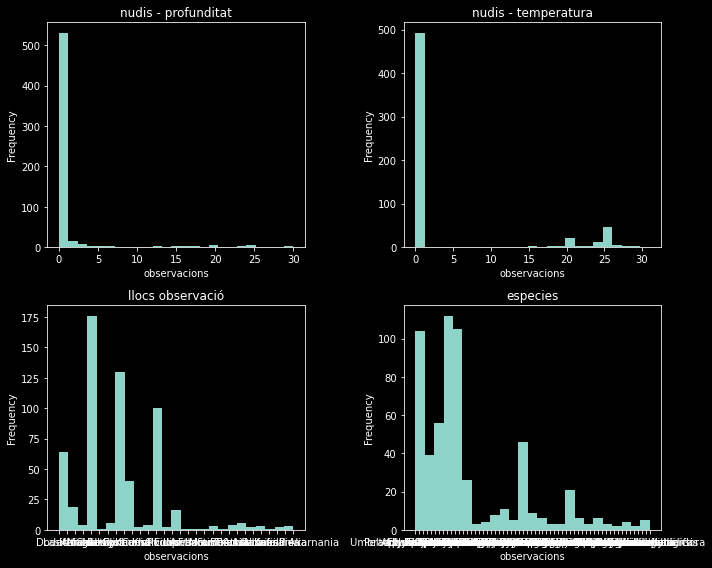

In [99]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(nudis['depth'], bins=25)
plt.title('nudis - profunditat')
plt.ylabel('Frequency')
plt.xlabel('observacions')

ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(nudis['temperature'], bins=25)

plt.title('nudis - temperatura')
plt.ylabel('Frequency')
plt.xlabel('observacions')

ax3 = fig.add_subplot(2, 2, 3)

ax3.hist(nudis['place'], bins=25)
plt.title('llocs observació')
plt.ylabel('Frequency')
plt.xlabel('observacions')

ax4 = fig.add_subplot(2, 2, 4)

ax4.hist(nudis['name'], bins=25)

plt.title('especies')
plt.ylabel('Frequency')
plt.xlabel('observacions')

plt.tight_layout()

In [100]:
#dimension
nudis.ndim

2

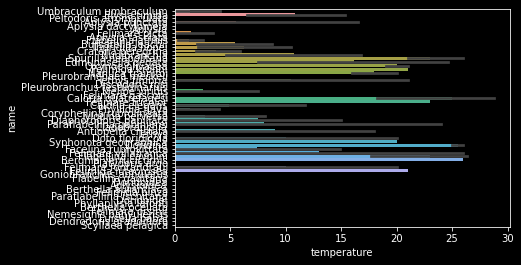

In [102]:
#plot poverty-state
sns.barplot(x='temperature', y='name', data=nudis, orient="h")
plt.show()

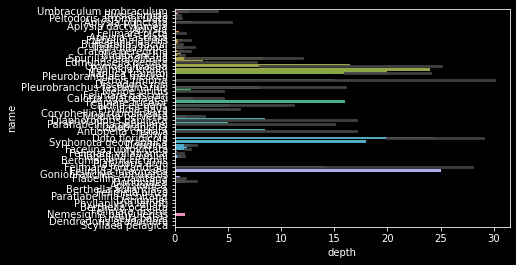

In [103]:
#plot poverty-state
sns.barplot(x='depth', y='name', data=nudis, orient="h")
plt.show()

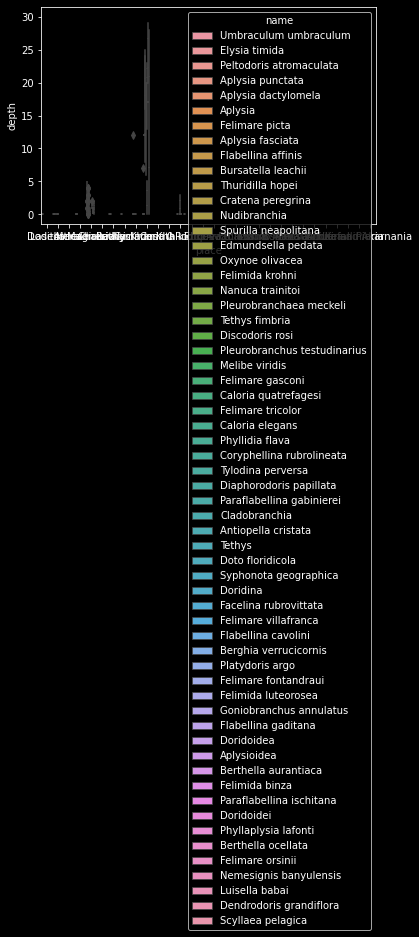

In [116]:
# boxplot 
# variable numèrica 'income'

sns.boxplot(x='place', y='depth', hue='name', 
               data=nudis[nudis.depth < 1000]);

In [123]:
t = nudis['temperature'] # variable quantitativa discreta
t.describe()

count    592.000000
mean       4.055743
std        9.091485
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       31.000000
Name: temperature, dtype: float64

In [126]:
import scipy.stats as stats
from scipy.stats import normaltest

print(normaltest(t)

SyntaxError: unexpected EOF while parsing (2227841552.py, line 4)

In [127]:
# rebutjar H0?

p_value = 
alpha = 
             
if p_value > alpha:
    print("We DON'T REJECT the null hypothesis H0")
else:
    print("We REJECT the null hypothesis H0")     

We REJECT the null hypothesis H0


In [ ]:
from scipy.stats import describe

tot=describe(mp)

print(tot)